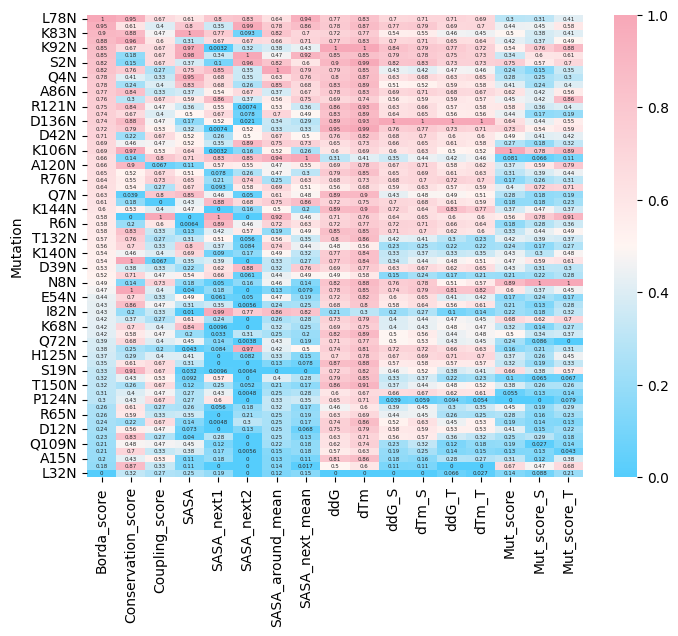

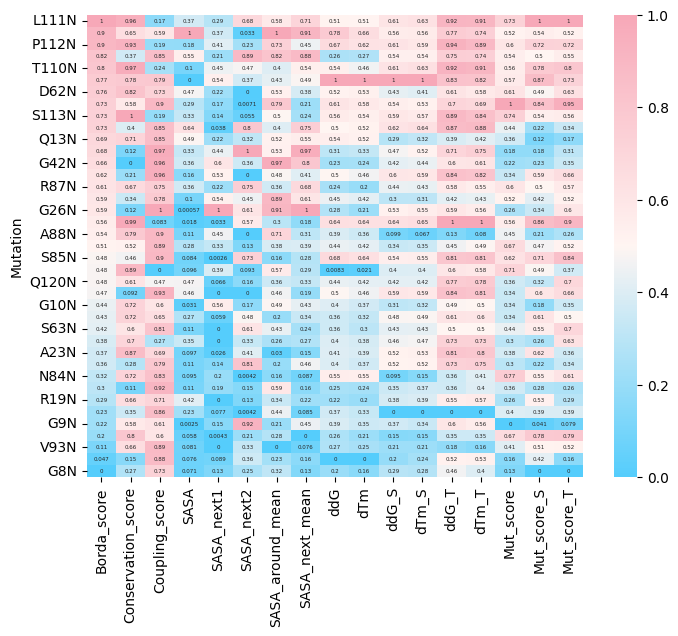

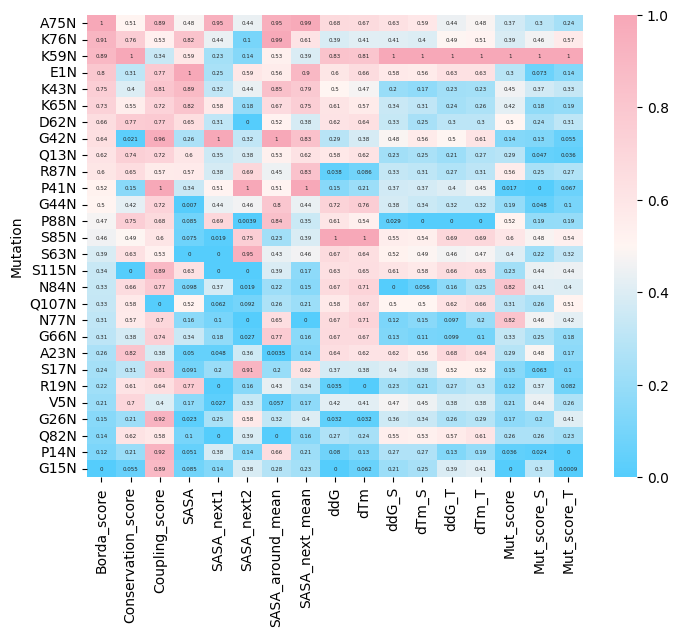

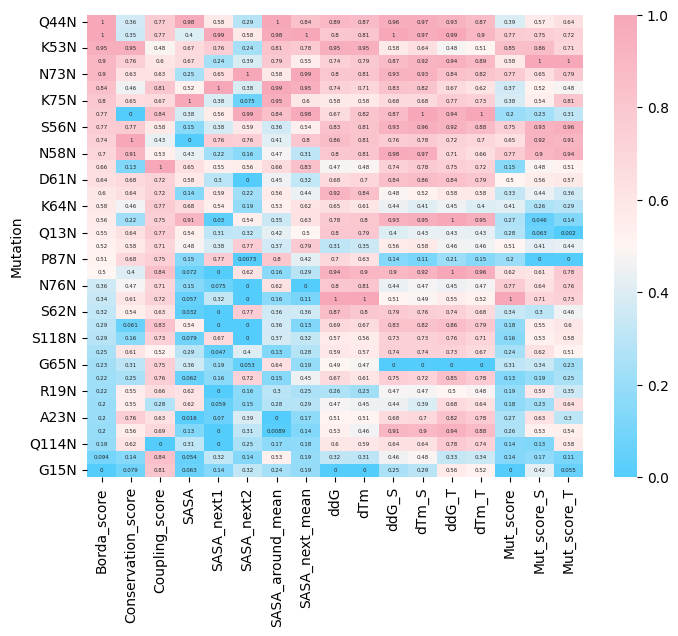

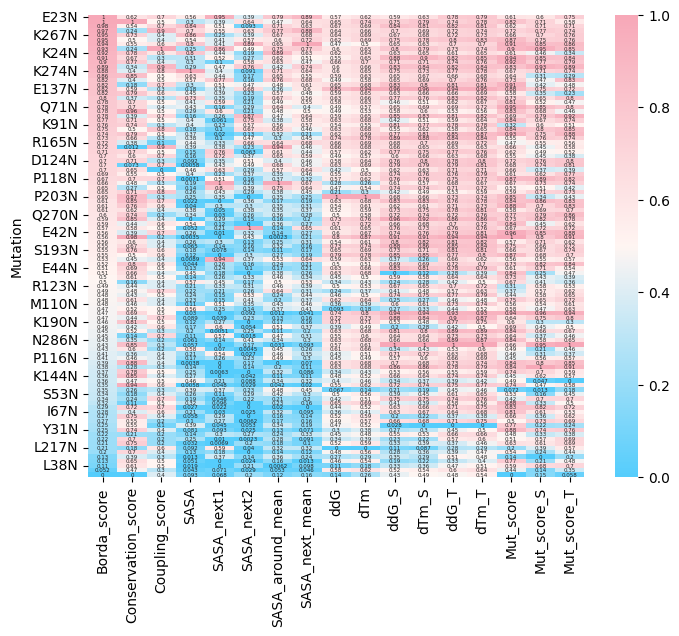

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.colors as mcolors
protein = ["FTL", "NB1", "NB2", "NB3", "URIC"]
# protein = ["FTL"]
for p in protein:
    df = pd.read_csv(f"/sdata2/WORK/Xuyi/{p}/{p}_single_points.csv")
    higher_is_better = {
                'Conservation_score': False,
                'Coupling_score': False,
                'SASA': True,
                'SASA_next1': True,
                'SASA_next2': True,
                'SASA_around_mean': True,
                'SASA_next_mean': True,
                "ddG": True,
                "dTm": True,
                "ddG_S": True,
                "dTm_S": True,
                "ddG_T": True,
                "dTm_T": True,
                'Mut_score': True,
                'Mut_score_S': True,
                'Mut_score_T': True,
            }
    for c, h in higher_is_better.items():
        if not h:
            df[c] = -df[c]
    del df["Site"], df["SS"], df["Clash"]
    df.set_index("Mutation", inplace=True)
    scaler = MinMaxScaler() 
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    
    plt.figure(figsize=(8, 6))
    three_color_cmap = mcolors.LinearSegmentedColormap.from_list("three_color_cmap", ["#55cdfc", "#FFF5F2", "#f7a8b8"], N=256)
    #"#FFB6C1", "#FFF8B0", "#A6D8FF"
    sns.heatmap(df_normalized, annot=True, cmap=three_color_cmap, cbar=True, annot_kws={"size": 4}, 
            vmin=0, vmax=1)
    plt.savefig(f"/sdata2/WORK/Xuyi/{p}/{p}.pdf")
    plt.show()
    


In [2]:
seq = "MGNNASSLSELNLFSKGGVFTREQLDEYQDCTFFTRKDIIRLYKRFYALNPHKVPTNMQGNRPAITTLTFEEVEKMPELKENPFKRRICEVFSEDGRGNLSFDDFLDMFSVFSEMAPLQLKLKYAFRIYDYDGDELLGHDDLSKMIRSLTRDELSDVEVEFIIERIIEEADLDGDSSINFAEFEHVVSRSPDFIRTFHIRI"
print(len(seq))

201
